501


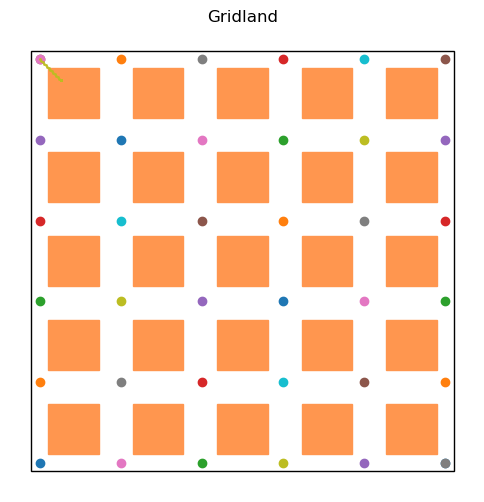

In [1]:
from gridland_environment import GridLand
import numpy as np
SIZE = 5
env = GridLand(n_size=SIZE,timeout = 500)
state, info = env.reset(start_idx='T0',goal_idx='B' + str(SIZE),difficulty='hard')
goal = info['goal']
fig, ax = env.get_mpl_plot(show_keypoints=True)

traj_record = [state]
terminated = False
truncated = False
action = np.array((1,-1))
while not terminated and not truncated:
    state, _, terminated, truncated, info = env.step(action)
    traj_record.append(state)
traj_record = np.array(traj_record)
ax.scatter(traj_record[:,0],traj_record[:,1],s=1)
print(len(traj_record))

## below is all flatland stuff

In [ ]:
from flatland_plus_environment import FlatLandPlus
from tqdm import trange
import numpy as np
import matplotlib.pyplot as plt
N = 2# number of dimensions in the flatland
save_directory = 'flatland_data'
timeout = 200
env = FlatLandPlus(n_dims = N)
n_facets = N * 2 
n_sg_pairs = int(n_facets * (n_facets-1))
rng = np.random.default_rng(seed = 42)
gaussian_scale = 0.05

(200, 2)
[False, False, False, False, False, False, False, False, False, True]
[array([ 0.03082139, -0.01144438]), array([-0.01082452, -0.00632512]), array([-0.02477554, -0.05761195]), array([-0.01823184, -0.03730491]), array([-0.06880411,  0.02556109]), array([ 0.02264892, -0.09281787]), array([-0.00541913,  0.04978507]), array([0.0547584 , 0.04135056]), array([-0.00423737, -0.05821979]), array([-0.05964207,  0.01123634])]
[array([0.48031294, 0.02605836]), array([ 0.47672275, -0.00641884]), array([ 0.52149154, -0.10006012]), array([ 0.40537112, -0.07263201]), array([ 0.34367068, -0.03067231]), array([ 0.48786277, -0.01011433]), array([0.45028273, 0.05879802]), array([ 4.96861716e-01, -4.14561706e-04]), array([0.48815671, 0.00765701]), array([ 0.36860873, -0.02682618])]


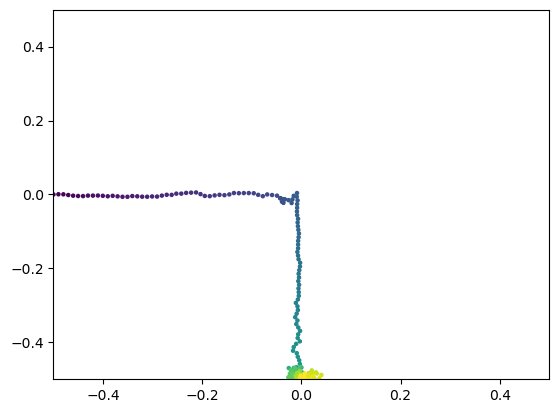

In [4]:
# basic test on one S-G pair
# checks for S-G pair being the same facet
start_index = 0
goal_index = 2
obs_record = []
actions = []
terminals = []
if start_index != goal_index:
    # setup
    been_to_middle = False
    obs, info = env.reset(start_idx=start_index,goal_idx=goal_index)
    start = obs
    goal = info['goal']
    middle = np.zeros_like(start)
    truncated = False
    # overall environment interaction loop
    while not truncated:
        obs_record.append(obs)
        if not been_to_middle: # travelling from start to middle
            # base action going towards middle
            action = middle-obs
            # adds small gaussian noise 
            action = action + rng.normal(loc=0,scale=gaussian_scale,size=action.shape)
        else: # travelling from middle to goal
            # base action going towards goal
            action = goal-obs
            # adds small gaussian noise 
            action = action + rng.normal(loc=0,scale=gaussian_scale,size=action.shape)
        # executes action
        obs, _ , _, truncated, _ = env.step(action)
        if np.linalg.norm(obs) < env.tolerance:
            been_to_middle = True
        actions.append(action)
        terminals.append(truncated)
# saving
obs_record = np.array(obs_record)
path_record = np.array(obs_record)
print(path_record.shape)
plt.scatter(path_record[:,0],path_record[:,1],c=range(len(path_record)),s=5)
plt.xlim(-0.5,0.5)
plt.ylim(-0.5,0.5)
print(terminals[-10:])
print(actions[-10:])
print(actions[:10])